In [4]:
#https://matplotlib.org/gallery/color/named_colors.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 
import seaborn as seabornInstance
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [5]:
col_data = {
    'Tweet ID' : str, 
    'Username' : str, 
    'Timestamp': str,
    'Follower' : int,
    'Friends'  : int,
    'Favorites': int,
    'Retweets' : int,
    'Entities' : str,
    'Sentiment': str,
    'Mentions' : str,
    'Hashtags' : str,
    'URLs'     : str
}

cols = ["Follower","Friends","Favorites",'Retweets']


In [6]:
data = pd.read_csv("/Users/macbookretina/Desktop/TweetsCOV19.tsv",sep='\t',dtype=col_data, parse_dates=True, names= list(col_data.keys()),error_bad_lines=False, usecols = cols)
data.head()

,Follower,Friends,Favorites,Retweets
0,619,770,0,0
1,36365,19344,13,17
2,5018,1933,0,0
3,2219,971,0,0
4,9009,4943,26,89


/Users/macbookretina/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


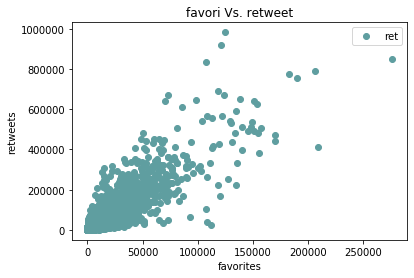

In [7]:
# define the x & y data.
x = data['Favorites']
y = data['Retweets']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'ret')

# make sure it's formatted.
plt.title("favori Vs. retweet")
plt.xlabel("favorites")
plt.ylabel("retweets")
plt.legend()

plt.show()

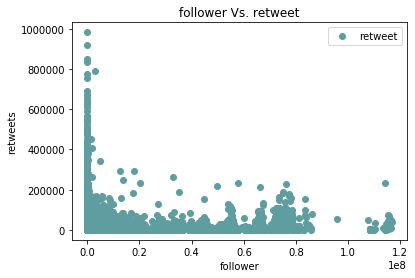

In [8]:
# define the x & y data.
x = data['Follower']
y = data['Retweets']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'retweet')

# make sure it's formatted.
plt.title("follower Vs. retweet")
plt.xlabel("follower")
plt.ylabel("retweets")
plt.legend()

plt.show()

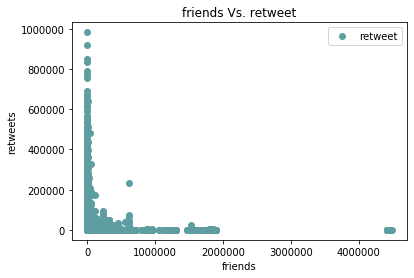

In [9]:
# define the x & y data.
x = data['Friends']
y = data['Retweets']

# create the scatter plot.
plt.plot(x, y, 'o', color ='cadetblue', label = 'retweet')

# make sure it's formatted.
plt.title("friends Vs. retweet")
plt.xlabel("friends")
plt.ylabel("retweets")
plt.legend()

plt.show()

In [10]:
X = data[['Favorites']]
Y = data['Retweets']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               Retweets   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                          3.264e+07
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                        0.00
Time:                        20:32:17   Log-Likelihood:                     -6.8132e+07
No. Observations:             8077794   AIC:                                  1.363e+08
Df Residuals:                 8077793   BIC:                                  1.363e+08
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

-11.116100087101074
[3.62712669]


In [51]:
Y_pred = regr.predict(X_test)
for i in range(len(Y_pred)):
    if Y_pred[i]<0:
        Y_pred[i]=0
Y_pred

array([ 0.        ,  0.        ,  0.        , ..., 32.40942015,
        0.        , 21.52804009])

In [52]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
4385397,1,0.000000
5923702,0,0.000000
3762119,0,0.000000
6065616,24,25.155167
5795552,220,97.697701
6965367,0,0.000000
2310632,22,72.307814
3163891,0,0.000000
3892181,173,177.494488
144781,0,0.000000


In [53]:
df.corr()

,Actual,Predicted
Actual,1.000000,0.891744
Predicted,0.891744,1.000000


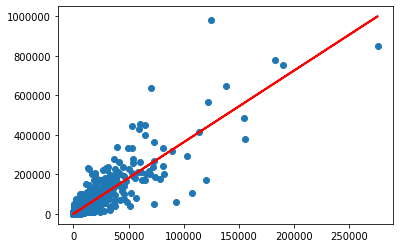

In [54]:
#plt.scatter(X_test, Y_test,  color='gainsboro')
plt.plot(X_test, Y_test, ls="none", marker='.', ms=12)
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()